In [ ]:

#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [1]:
# Read the dataset into a pandas DataFrame object
import pandas as pd
df = pd.read_csv("/Users/arib/Downloads/rwf577.csv")
df

,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['Reduction'] = df['Reduction'].map({'No':0, 'Yes':1})

In [3]:
df_f = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
#Confirm those variables were sucessfully dropped
df_f

,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Reduction'] = le.fit_transform(res_df['Reduction'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df_f)

In [6]:
#Selecting features
X = encoded_df.drop(['Reduction'],axis =1)
y = encoded_df['Reduction']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Reduction, Length: 1470, dtype: int64

In [8]:
import numpy as np 
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [10]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 40)


In [11]:

# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

#Fit the model with data
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')


To retain 90 % of the variation, we needed 21 components


In [12]:

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)


(1102, 21)
(368, 21)


LinearRegression() PCA:  LinearRegression()  MSE:  0.10829
KNeighborsRegressor(n_neighbors=4) PCA:  KNeighborsRegressor(n_neighbors=4)  MSE:  0.13723
DecisionTreeRegressor(max_depth=4) PCA:  DecisionTreeRegressor(max_depth=4)  MSE:  0.12564
SVR() PCA:  SVR()  MSE:  0.1103


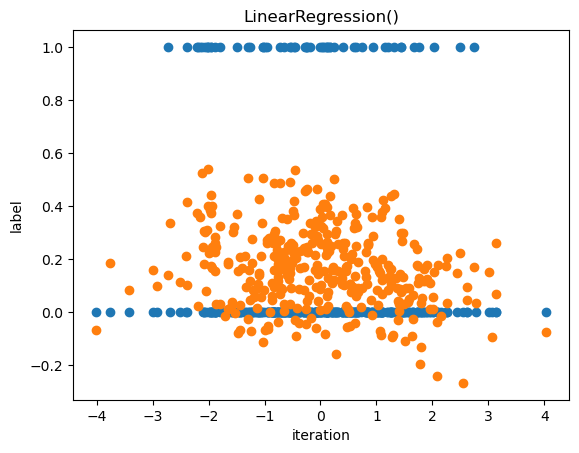

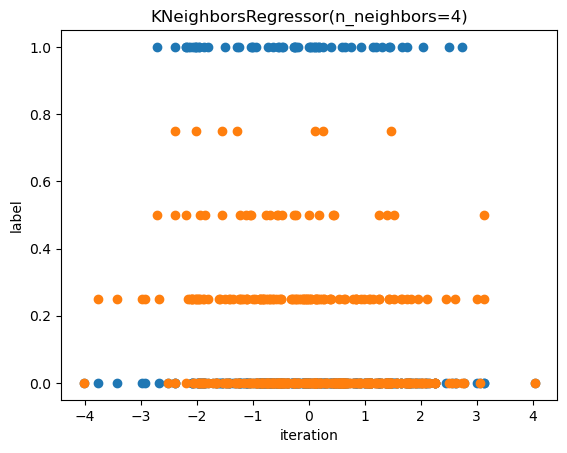

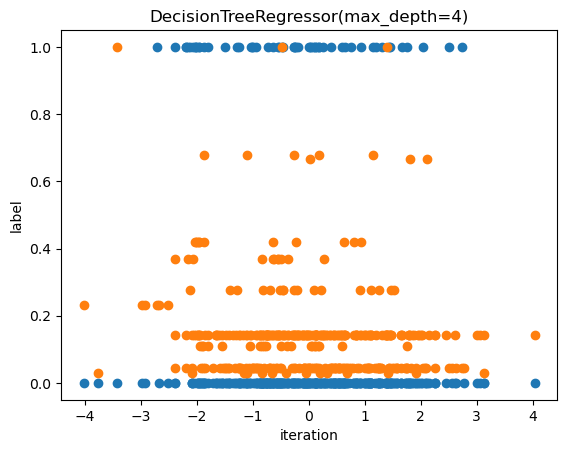

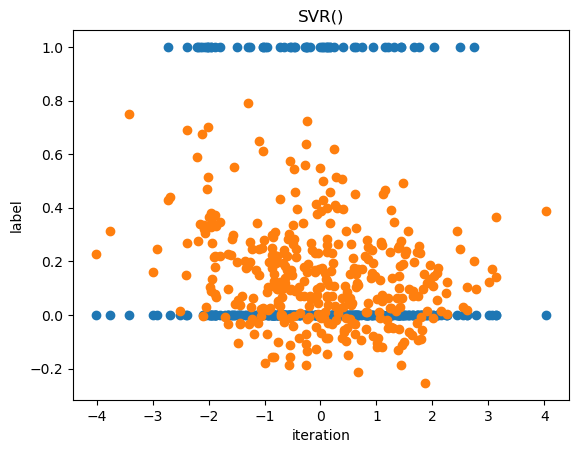

In [17]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

#Load models
lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=4)
dt = DecisionTreeRegressor(max_depth=4)
svm = SVR()

models = [lin_reg,knn,dt,svm]

#Visualize each model
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(model, "PCA: ", model," MSE: ", np.round(mean_squared_error(y_test, y_pred),5))
    for i in range(1, X_test_pca.shape[1]):
        if i == 1:
            fig,ax = plt.subplots(1,1)
            ax.scatter(X_test_pca[:,i], y_test, label = 'predicted')
            ax.scatter(X_test_pca[:,i], y_pred, label = 'actual')
            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')


In [18]:

accuracy = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'], 
               'Accuracy - no PCA (%)': [90, 85, 85, 85, 87, 87, 86], 
               'Accuracy - PCA (%)': [88, 84, 84, 86, 88, 86, 85]
              }

acc = pd.DataFrame(data=accuracy)
acc



,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,Logistic Regression,90,88
1,Decision Tree - Gini,85,84
2,Decision Tree - Entropy,85,84
3,K Nearest Neighbors,85,86
4,Naive Bayes,87,88
5,SVM,87,86
6,Random Forest,86,85


In [19]:

acc = acc.set_index('Model')



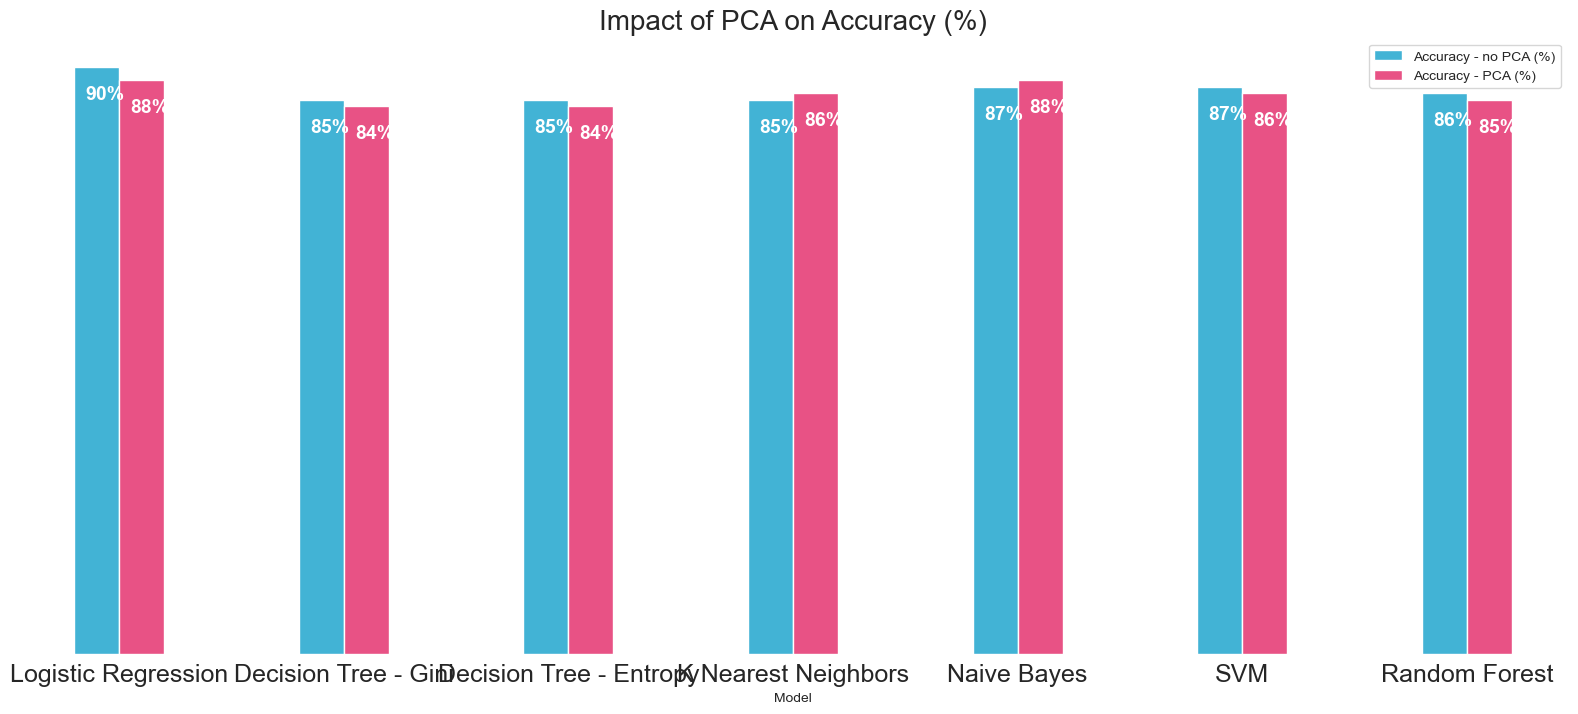

In [20]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()


In [21]:

time = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'],
                  'Train Time - no PCA (s) ': [0.0325, 0.0105, 0.0113, 0.0147, 0.0040, 0.3665, 0.5382],
                  'Train Time - PCA (s) ': [0.0150, 0.0112, 0.0140, 0.0105, 0.0030, 0.3492, 0.7902]}

tm = pd.DataFrame(data=time)
tm



,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,Logistic Regression,0.0325,0.0150
1,Decision Tree - Gini,0.0105,0.0112
2,Decision Tree - Entropy,0.0113,0.0140
3,K Nearest Neighbors,0.0147,0.0105
4,Naive Bayes,0.0040,0.0030
5,SVM,0.3665,0.3492
6,Random Forest,0.5382,0.7902


In [23]:


tm = tm.set_index('Model')


Text(0.5, 1.0, 'Impact of PCA on Train Time (Seconds)')

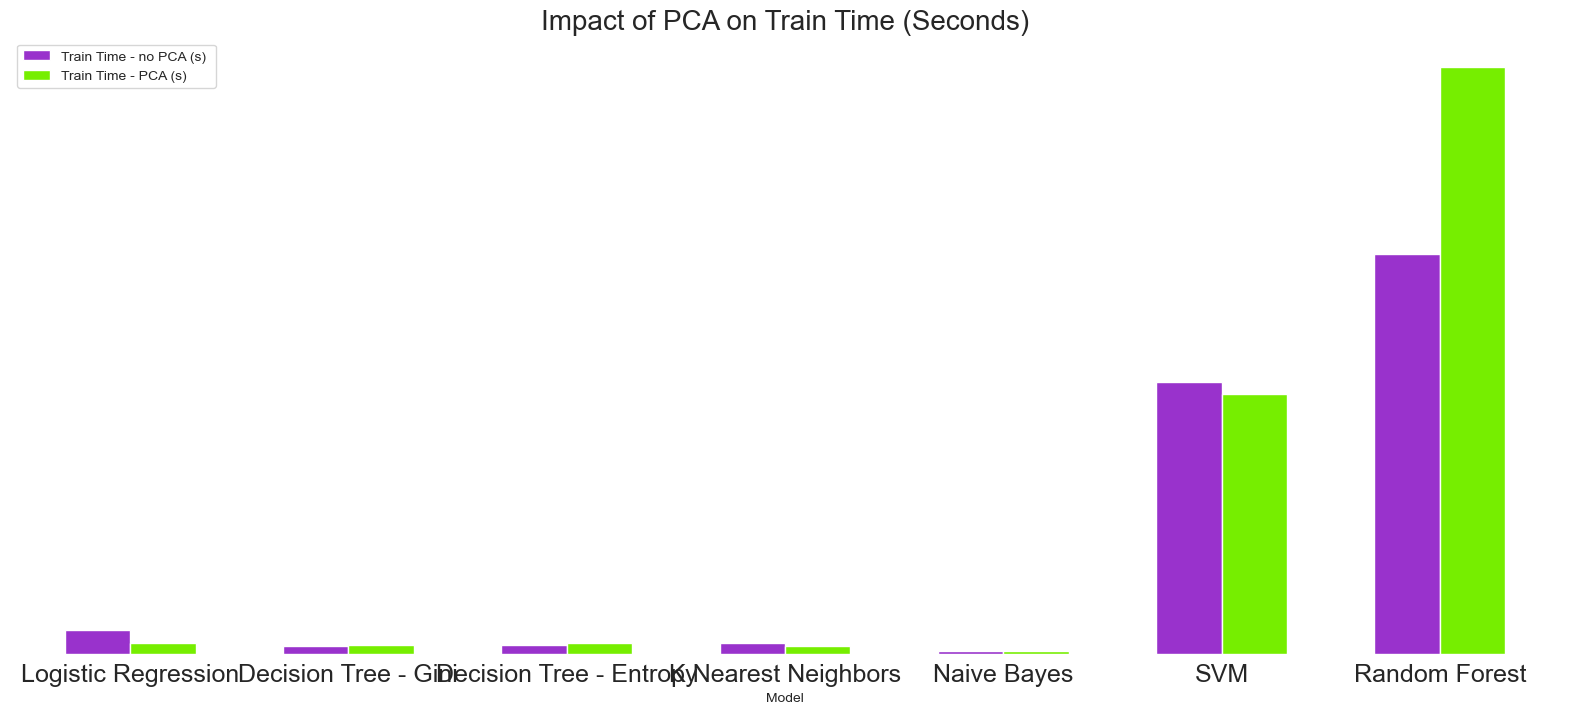

In [24]:

ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)

